##K-Means Clustering Task - 3 

From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.isnull().values.any()

False

In [6]:
columns = list(data)[1:-1]
columns

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87f5c0b5f8>


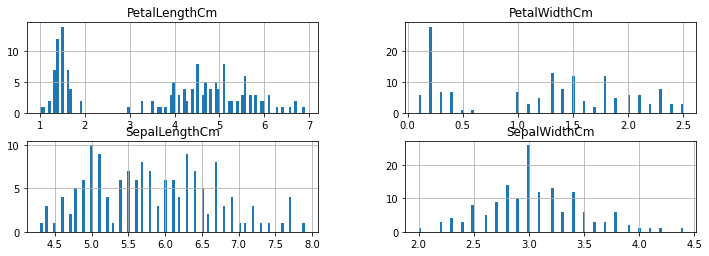

In [21]:
# Histograms of all the 4 columns for better visualization
print(data[columns].hist(stacked=False,bins=100,figsize=(12,30),layout=(14,2)))

In [8]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [11]:
# Here we will be taking the first four columns of our data
data1 = data.iloc[:, [0, 1, 2, 3]].values

In [12]:
from sklearn.cluster import KMeans

In [13]:
# calculate distortion for a range of number of cluster
distortions = []

for i in range(1,11):
  k_means = KMeans(n_clusters=i,random_state=0).fit(data1)
  k_means.fit(data1)
  distortions.append(k_means.inertia_)

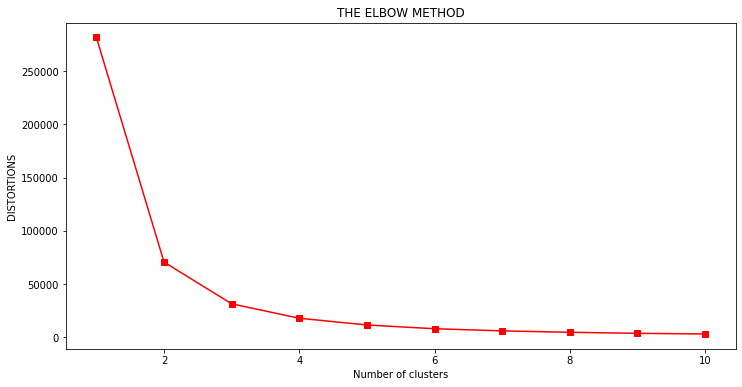

In [15]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), distortions,'rs-')

"""The elbow method, in which the sum of squares at each number of clusters is 
   calculated and graphed, and the user looks for a change of slope from steep 
   to shallow (an elbow) to determine the optimal number of clusters."""
   
   # Plotting thr Graph
plt.title('THE ELBOW METHOD') 
plt.xlabel('Number of clusters')
plt.ylabel('DISTORTIONS') # this can stand here for Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

In [16]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
y_kmeans = kmeans.fit_predict(data1)

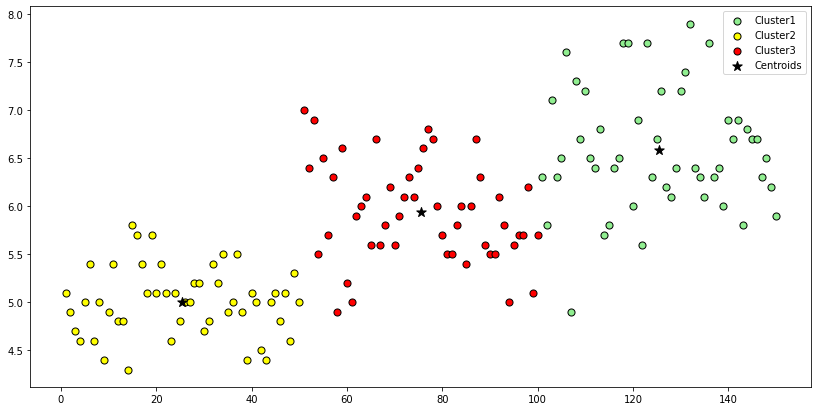

In [22]:
plt.figure(figsize=(14,7))
plt.scatter(data1[y_kmeans == 0, 0], data1[y_kmeans == 0, 1], 
            s = 50, c = 'lightgreen', edgecolor='black' ,label = 'Cluster1')
plt.scatter(data1[y_kmeans == 1, 0], data1[y_kmeans == 1, 1], 
            s = 50, c = 'yellow', edgecolor='black', label = 'Cluster2')
plt.scatter(data1[y_kmeans == 2, 0], data1[y_kmeans == 2, 1],
            s = 50, c = 'red', edgecolor='black', label = 'Cluster3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, marker='*', edgecolor='black', c = 'black', label = 'Centroids')

plt.legend()